In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
#генерируем выборку из 1000 объектов из распределения Вейбулла c параметром l=1.5
from scipy.stats import weibull_min
l = 1.5
weibull = weibull_min.rvs(l,size=1000)

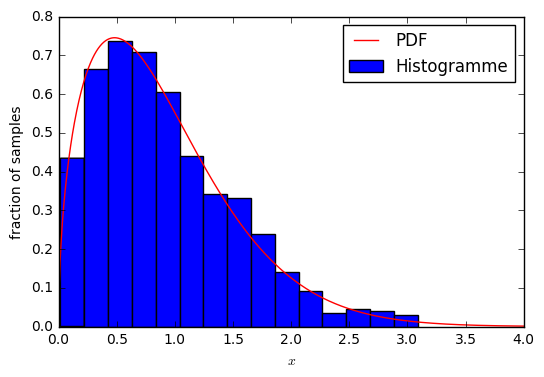

In [226]:
#строим гистограмму по сгенерированной из распределения выборке и плотность распределения этой случайной величины на одном графике
x = np.linspace(0,4,1000)
plt.hist(weibull, normed=True,bins=15,label='Histogramme')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.plot(x,weibull_min.pdf(x,l),'red',label='PDF')
plt.legend()

In [227]:
#Рассчитываем параметры (среднее и дисперсию) для теоретического нормального распределения среднего значения 
# по выборкам из распределения Вейбулла 
from scipy.stats import norm
import math
mu = weibull_min.stats(l,moments='m')
sigma = weibull_min.stats(l,moments='v')

Формула для расчета плотности теоретического нормального распределения для выборок разных размеров: $$X = N( mu, \sqrt{\frac{sigma}{n}})$$, где $mu$ - теоретическое мат. ожидание распределения, $sigma$ - теоретическая дисперсия распределения, $n$ - количество элементов в выборке.

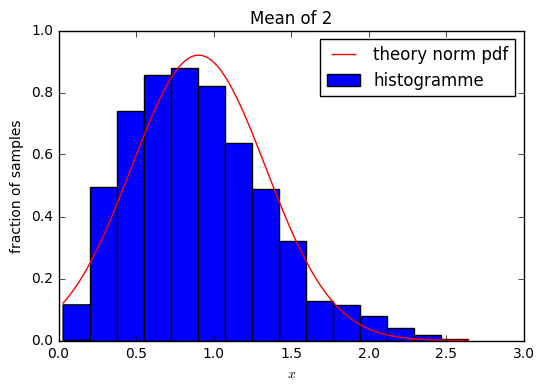

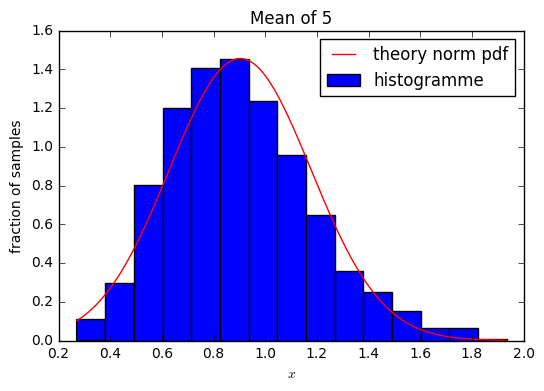

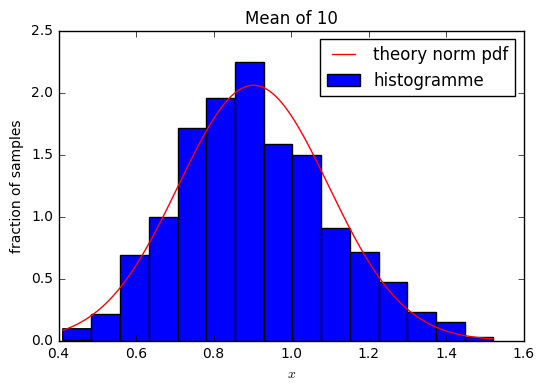

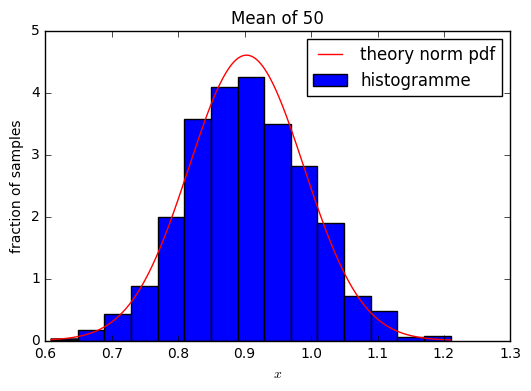

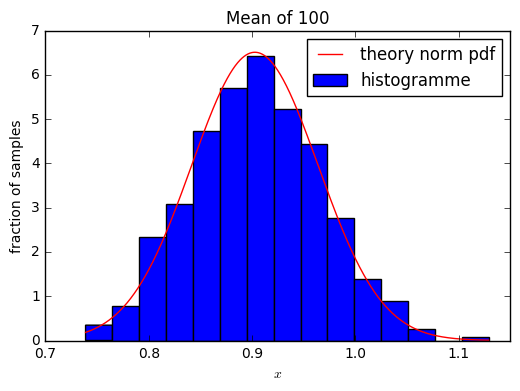

In [230]:
#рисуем гистограммы для 1000 выборок размером 5,10,50,100,500,1000,10000,100000 c помощью цикла
#также рисуем теоретическую плотности нормального распределения средних значений поверх гистограмм 
list_n=[2,5,10,50,100]


for n in list_n:
    val=[]
    for i in range(1,1000,1):
        val.append(weibull_min.rvs(l,size=n).mean())
    x = np.linspace(min(val),max(val),1000)
    plt.hist(val,label = 'histogramme',normed=True,bins=15)
    plt.title('Mean of {}'.format(n))
    plt.plot(x,norm(loc=mu,scale=(math.sqrt(sigma/float(n)))).pdf(x),'red',label = 'theory norm pdf')
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.legend()
    plt.show()

Вывод: с увеличением количества элементов в выборках, среднее по выборке начинает подчинятся нормальному распределению.